# /home/helal/Downloads/stock_trading_data.csv

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [31]:
df = pd.read_csv("stock_trading_data.csv")
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [32]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,724.909973,724.909973,714.609985,716.549988,716.549988,1565300
1,2016-06-07,719.840027,721.979980,716.549988,716.650024,716.650024,1336200
2,2016-06-08,723.960022,728.570007,720.580017,728.280029,728.280029,1583700
3,2016-06-09,722.869995,729.539978,722.335999,728.580017,728.580017,988900
4,2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
...,...,...,...,...,...,...,...
1253,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100
1254,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400
1255,2021-06-01,2422.000000,2437.970947,2404.879883,2429.810059,2429.810059,958300
1256,2021-06-02,2435.310059,2442.000000,2404.199951,2421.280029,2421.280029,857900


In [11]:
#we will take only 5 columns
df = df.iloc[:,:5]

In [12]:
df

,Date,Open,High,Low,Close
0,2016-06-06,724.909973,724.909973,714.609985,716.549988
1,2016-06-07,719.840027,721.979980,716.549988,716.650024
2,2016-06-08,723.960022,728.570007,720.580017,728.280029
3,2016-06-09,722.869995,729.539978,722.335999,728.580017
4,2016-06-10,719.469971,725.890015,716.429993,719.409973
...,...,...,...,...,...
1253,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010
1254,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059
1255,2021-06-01,2422.000000,2437.970947,2404.879883,2429.810059
1256,2021-06-02,2435.310059,2442.000000,2404.199951,2421.280029


In [13]:
#Divide the data into train and test
test_size =np.round(df.shape[0] *30/100).astype(int)
df1_train = df.iloc[test_size:,:]
df1_test = df.iloc[:test_size,:]

df1_train.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

<Figure size 1000x800 with 0 Axes>

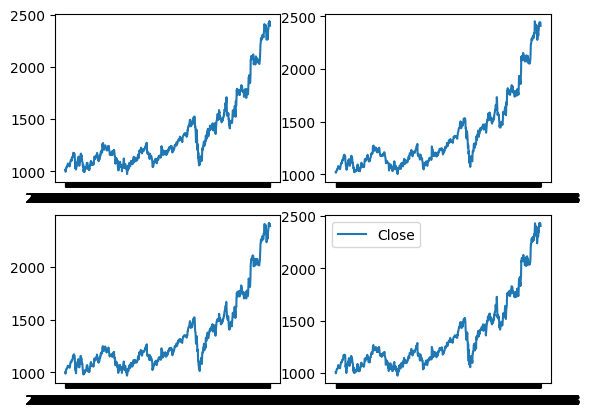

In [14]:
#let's plot the graph aand try to visualize for all columns based on date
plt.figure(figsize=(10,8))
figure,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(df1_train["Date"],df1_train["Open"],label="Open")
axes[0,1].plot(df1_train["Date"],df1_train["High"],label="High")
axes[1,0].plot(df1_train["Date"],df1_train["Low"],label="Low")
axes[1,1].plot(df1_train["Date"],df1_train["Close"],label="Close")
plt.legend()

In [15]:
#prepare the dateset for FBprophet
df1_train.rename(columns={"Open":'y',"Date":'ds'},inplace=True)
df1_train.head(5)

/tmp/ipykernel_7293/87598013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_train.rename(columns={"Open":'y',"Date":'ds'},inplace=True)


,ds,y,High,Low,Close
377,2017-12-01,1015.799988,1022.489990,1002.020020,1010.169983
378,2017-12-04,1012.659973,1016.099976,995.570007,998.679993
379,2017-12-05,995.940002,1020.609985,988.280029,1005.150024
380,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005
381,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054


In [58]:
model = Prophet(interval_width=0.9)
model.add_regressor('High',standardize=False)
model.add_regressor('Low',standardize=False)
model.add_regressor('Close', standardize=False)
model.fit(df1_train)

19:26:47 - cmdstanpy - INFO - Chain [1] start processing
19:26:47 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
#model.params

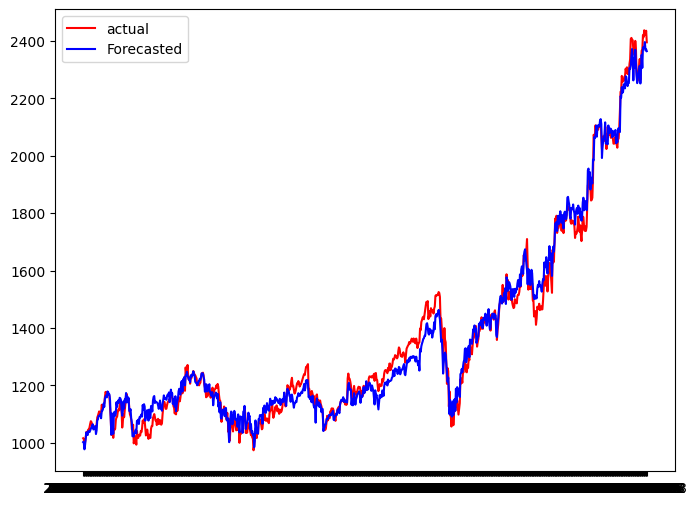

In [20]:
#understanding the model fit--------------------------------------------
df1_train_2 = df1_train[["ds","High","Low","Close"]] #we will be predicting 'y' i.e."Open"
forecast1_train = model.predict(df1_train_2)
forecast1_train = forecast1_train[['ds','yhat']]
df_model_fit = pd.concat((forecast1_train['yhat'],df1_train.reset_index()),axis=1).reset_index()

#Visualize it 
plt.figure(figsize=(8,6))
plt.plot(df_model_fit['ds'],df_model_fit['y'],color='red',label='actual')
plt.plot(df_model_fit['ds'],df_model_fit['yhat'],color='blue',label='Forecasted')
plt.legend()

In [21]:
#create an test dataframe
df1_test.rename(columns={"Open":'y',"Date":'ds'},inplace=True)
df1_test.head(5)

df1_test_2 = df1_test[["ds","High","Low","Close"]] #predicting 'y'i.e."Open"
df1_test_2

forecast1_test=model.predict(df1_test_2)
forecast1_test = forecast1_test[['ds','yhat']]

df_testdata_fit = pd.concat((forecast1_test['yhat'],df1_test.reset_index()),axis=1).reset_index()

/tmp/ipykernel_7293/4121081071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test.rename(columns={"Open":'y',"Date":'ds'},inplace=True)


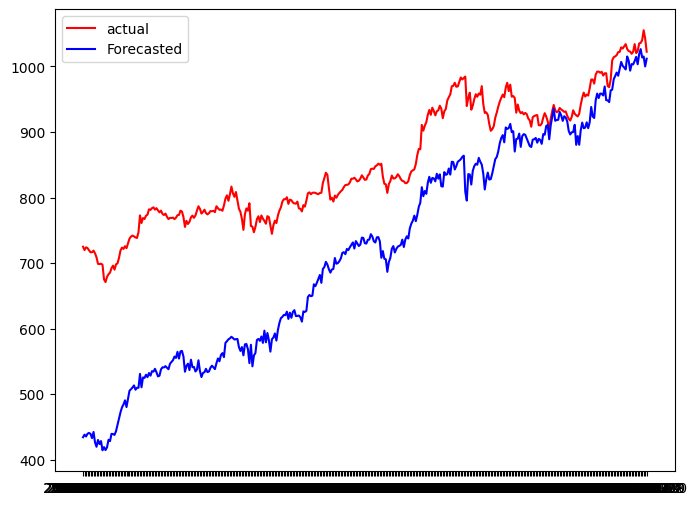

In [23]:
#Visualize it 
plt.figure(figsize=(8,6))
plt.plot(df_testdata_fit['ds'],df_testdata_fit['y'],color='red',label='actual')
plt.plot(df_testdata_fit['ds'],df_testdata_fit['yhat'],color='blue',label='Forecasted')
plt.legend()

# https://vonum.medium.com/forecasting-multiple-dependent-variables-with-facebook-prophet-61e12302d50b

# https://www.evergreeninnovations.co/time-series-forecasting-with-facebook-prophet/

# kaggle data_ https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather

In [29]:
df = pd.read_csv("/home/helal/Desktop/LENIN/HOURLY_GENERATED-DATA/DATA/weather_features.csv ")

FileNotFoundError: [Errno 2] No such file or directory: '/home/helal/Desktop/LENIN/HOURLY_GENERATED-DATA/DATA/weather_features.csv '

In [ ]:
/home/helal/Desktop/LENIN/HOURLY_GENERATED-DATA/archive 

In [ ]:
df = pd.read_csv("/home/helal/Desktop/LENIN/HOURLY_GENERATED-DATA/DATA/weather_features.csv ")